# Examine $\xi$ near crosshatched and undetermined stability results

The crosshatched region marks the suydam unstable cases.
Let's look at the profiles of the Suydam unstable cases to undertand why they are suydam unstable. 

In [20]:
#imports
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

import sys
sys.path.append('..')
sys.path.append('../scipy_mod')

import numpy as np
from scipy.interpolate import splev

import equil_solver as es
import newcomb_simple as new
reload(new)

from copy import deepcopy

import diagnostic_plots
reload(diagnostic_plots)

<module 'diagnostic_plots' from '../diagnostic_plots.pyc'>

# A stable case

In [86]:
#parameters
k_bar = 1.0
lambda_bar = 0.5 
xi_factor = 1.
magnetic_potential_energy_ratio = 1.
offset = 1e-3
suydam_end_offset = 1e-3
sing_search_points = 100
suppress_output = True
rtol = 1e-2
max_step = 1e-2
nsteps = 1e3
init_value = 1.
method = 'lsoda'
diagnose = True
stiff = True
use_jac = True
params = {'k': k_bar,
          'm': -1,
          'r_0': 0,
          'a': 1.,
          'b': 'infinity'}
profile_kwargs = {'epsilon': 0.5,
                  'points_core': 50,
                  'points_skin': 20,
                  'points_transition': 20,
                  'core_radius_norm':  0.6,
                  'transition_width_norm': 0.175,
                  'skin_width_norm': 0.05}

false


(-1, 10)

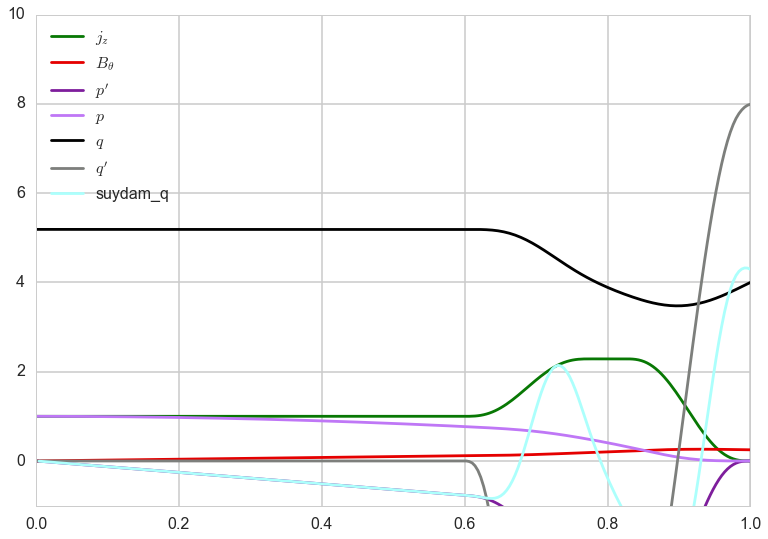

In [87]:
#create profile and determine external stability
profile = es.UnitlessSmoothedCoreSkin(k_bar=k_bar,
                                      lambda_bar=lambda_bar,
                                      **profile_kwargs)

diagnostic_plots.plot_all_profiles_suydam(profile)
plt.ylim((-1,10))

# A case in the large undetermined region

In [63]:
#parameters
k_bar = 1.
lambda_bar = 2.5
xi_factor = 1.
magnetic_potential_energy_ratio = 1.
offset = 1e-3
suydam_end_offset = 1e-3
sing_search_points = 100
suppress_output = True
rtol = 1e-5
max_step = 1e-4
nsteps = 1e5
init_value = 1.
method = 'lsoda_odeint'
diagnose = True
stiff = False
use_jac = False
adapt_step_size = True
adapt_min_steps = 5e4
params = {'k': k_bar,
          'm': -1,
          'r_0': 0,
          'a': 1.,
          'b': 'infinity'}
profile_kwargs = {'epsilon': 0.1,
                  'points_core': 5000,
                  'points_skin': 5000,
                  'points_transition': 5000,
                  'core_radius_norm': 0.6,
                  'transition_width_norm': 0.175,
                  'skin_width_norm': 0.05}

In [64]:
#create profile and determine external stability
profile = es.UnitlessSmoothedCoreSkin(k_bar=k_bar,
                                      lambda_bar=lambda_bar,
                                      **profile_kwargs)

false


(-1, 15)

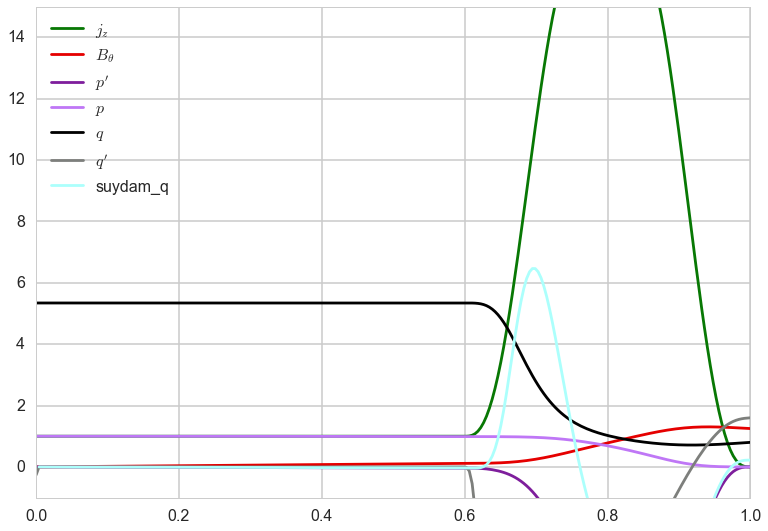

In [66]:
diagnostic_plots.plot_all_profiles_suydam(profile)
plt.ylim((-1, 15))

q crosses zero when when suydam dips below zero.

# Another test case with higher epsilon

In [71]:
#parameters
k_bar = 1.0
lambda_bar = 2.5
xi_factor = 1.
magnetic_potential_energy_ratio = 1.
offset = 1e-3
suydam_end_offset = 1e-3
sing_search_points = 100
suppress_output = True
rtol = 1e-5
max_step = 1e-4
nsteps = 1e5
init_value = 1.
method = 'lsoda'
diagnose = True
stiff = True
use_jac = True
params = {'k': k_bar,
          'm': -1,
          'r_0': 0,
          'a': 1.,
          'b': 'infinity'}
profile_kwargs = {'epsilon': 0.5,
                  'points_core': 50,
                  'points_skin': 50,
                  'points_transition': 50,
                  'core_radius_norm': 0.6,
                  'transition_width_norm': 0.175,
                  'skin_width_norm': 0.05}

In [72]:
#create profile and determine external stability
profile = es.UnitlessSmoothedCoreSkin(k_bar=k_bar,
                                      lambda_bar=lambda_bar,
                                      **profile_kwargs)
params_wo_splines = deepcopy(params)
params.update(profile.get_tck_splines())
params.update({'xi_factor': xi_factor,
               'magnetic_potential_energy_ratio': magnetic_potential_energy_ratio,
               'beta_0': profile.beta_0(),
               'core_radius': profile.core_radius,
               'transition_width': profile.transition_width,
               'skin_width': profile.skin_width,
               'points_core': profile.points_core,
               'points_transition': profile.points_transition,
               'points_skin': profile.points_skin,
               'epsilon': profile.epsilon})

false


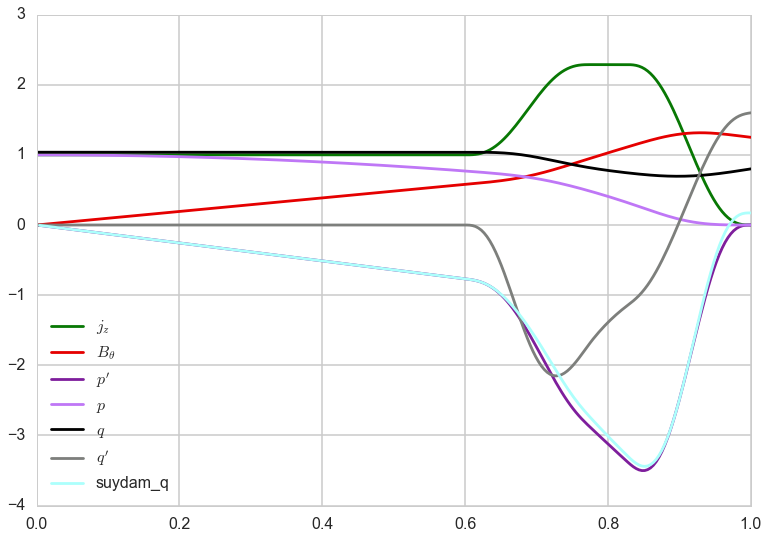

In [73]:
diagnostic_plots.plot_all_profiles_suydam(profile)

# Now look at the diffuse (exponential) core skin profile

In [81]:
#parameters
k_bar = 0.8
lambda_bar = 0.5
xi_factor = 1.
magnetic_potential_energy_ratio = 1.
offset = 1e-3
suydam_end_offset = 1e-3
sing_search_points = 100
suppress_output = True
rtol = 1e-5
max_step = 1e-4
nsteps = 1e5
init_value = 1.
method = 'lsoda'
diagnose = True
stiff = True
use_jac = True
params = {'k': k_bar,
          'm': -1,
          'r_0': 0,
          'a': 1.,
          'b': 'infinity'}
profile_kwargs = {'epsilon': 0.3,
                  'points_core': 50,
                  'points_skin': 50}

profile = es.UnitlessExponentialDecaySkin(k_bar=k_bar,
                                          lambda_bar=lambda_bar,
                                          **profile_kwargs)

false


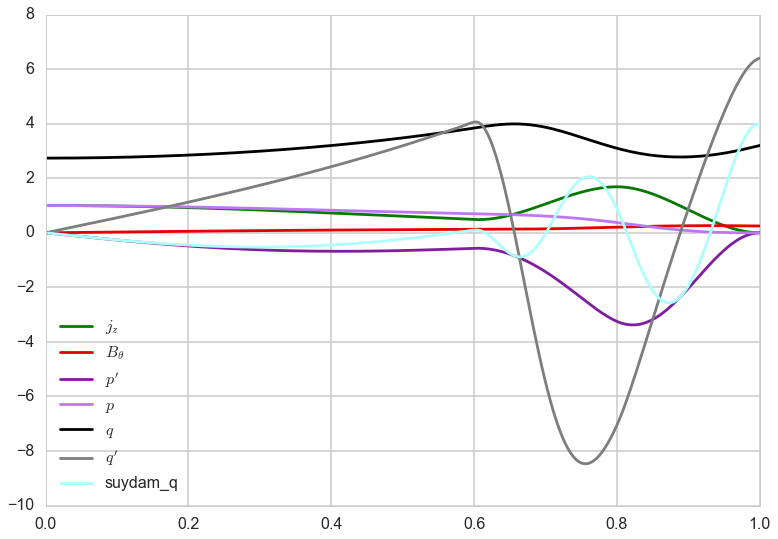

In [82]:
diagnostic_plots.plot_all_profiles_suydam(profile)

false


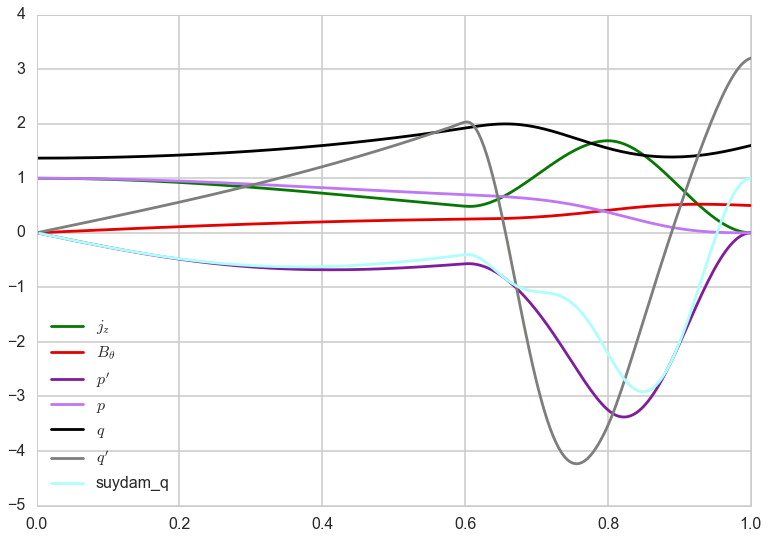

In [84]:
#parameters
k_bar = 0.8
lambda_bar = 1.0
xi_factor = 1.
magnetic_potential_energy_ratio = 1.
offset = 1e-3
suydam_end_offset = 1e-3
sing_search_points = 100
suppress_output = True
rtol = 1e-5
max_step = 1e-4
nsteps = 1e5
init_value = 1.
method = 'lsoda'
diagnose = True
stiff = True
use_jac = True
params = {'k': k_bar,
          'm': -1,
          'r_0': 0,
          'a': 1.,
          'b': 'infinity'}
profile_kwargs = {'epsilon': 0.3,
                  'points_core': 50,
                  'points_skin': 50}

profile = es.UnitlessExponentialDecaySkin(k_bar=k_bar,
                                          lambda_bar=lambda_bar,
                                          **profile_kwargs)
diagnostic_plots.plot_all_profiles_suydam(profile)

In [85]:
#parameters
k_bar = 0.8
lambda_bar = 2.
xi_factor = 1.
magnetic_potential_energy_ratio = 1.
offset = 1e-3
suydam_end_offset = 1e-3
sing_search_points = 100
suppress_output = True
rtol = 1e-5
max_step = 1e-4
nsteps = 1e5
init_value = 1.
method = 'lsoda'
diagnose = True
stiff = True
use_jac = True
params = {'k': k_bar,
          'm': -1,
          'r_0': 0,
          'a': 1.,
          'b': 'infinity'}
profile_kwargs = {'epsilon': 0.3,
                  'points_core': 50,
                  'points_skin': 50}

profile = es.UnitlessExponentialDecaySkin(k_bar=k_bar,
                                          lambda_bar=lambda_bar,
                                          **profile_kwargs)

false


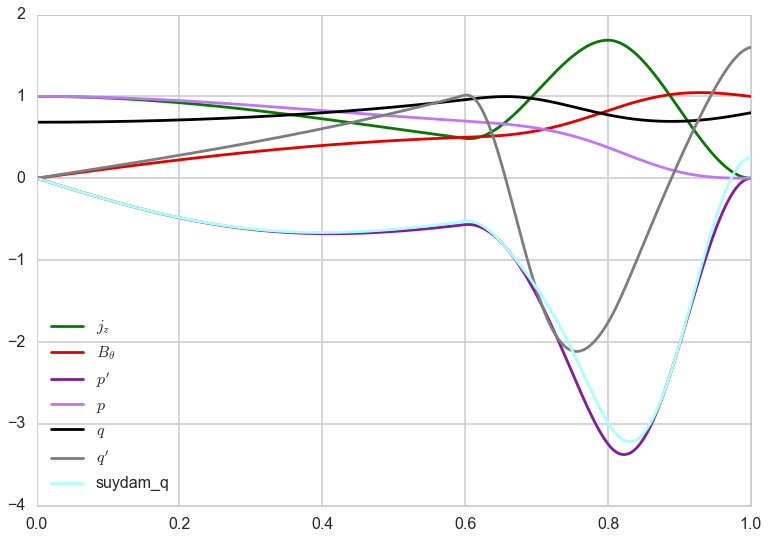

In [76]:
diagnostic_plots.plot_all_profiles_suydam(profile)

# Plot contours of $\beta_0$

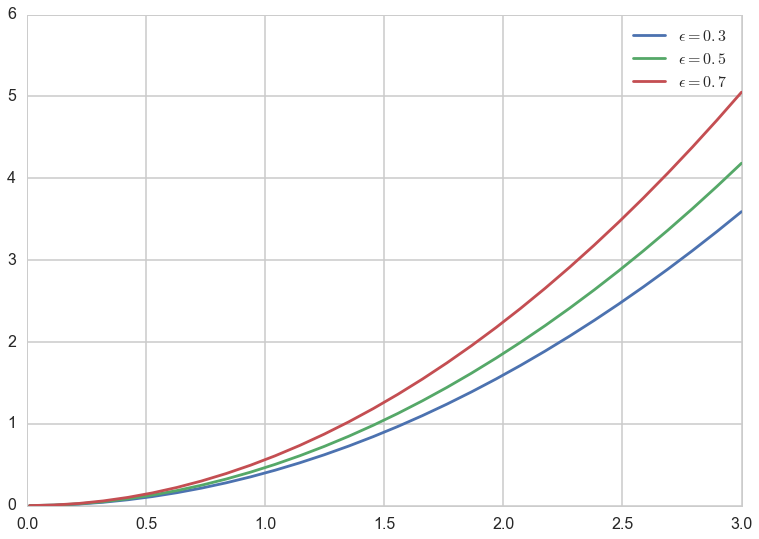

In [98]:
lambda_bars = np.linspace(0.01, 3., 30)
betas = np.zeros(lambda_bars.shape)

for i, lambda_bar in enumerate(lambda_bars):
    profile = es.UnitlessSmoothedCoreSkin(k_bar=1.0,
                                          lambda_bar=lambda_bar,
                                          epsilon=0.3, 
                                          core_radius_norm=0.6,
                                          transition_width_norm=0.175,
                                          skin_width_norm=0.05)
    betas[i] = profile.beta_0()
plt.plot(lambda_bars, betas, label=r'$\epsilon=0.3$')

for i, lambda_bar in enumerate(lambda_bars):
    profile = es.UnitlessSmoothedCoreSkin(k_bar=1.0,
                                          lambda_bar=lambda_bar,
                                          epsilon=0.5, 
                                          core_radius_norm=0.6,
                                          transition_width_norm=0.175,
                                          skin_width_norm=0.05)
    betas[i] = profile.beta_0()
plt.plot(lambda_bars, betas, label=r'$\epsilon=0.5$')

for i, lambda_bar in enumerate(lambda_bars):
    profile = es.UnitlessSmoothedCoreSkin(k_bar=1.0,
                                          lambda_bar=lambda_bar,
                                          epsilon=0.7, 
                                          core_radius_norm=0.6,
                                          transition_width_norm=0.175,
                                          skin_width_norm=0.05)
    betas[i] = profile.beta_0()
plt.plot(lambda_bars, betas, label=r'$\epsilon=0.7$')
plt.legend()

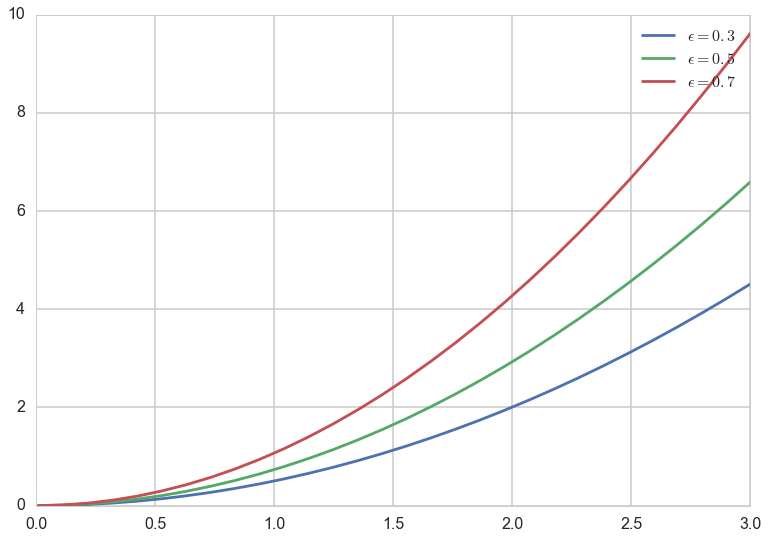

In [99]:
lambda_bars = np.linspace(0.01, 3., 30)
betas = np.zeros(lambda_bars.shape)

for i, lambda_bar in enumerate(lambda_bars):
    profile = es.UnitlessExponentialDecaySkin(k_bar=k_bar,
                                              lambda_bar=lambda_bar,
                                              epsilon=0.3)
    betas[i] = profile.beta_0()
plt.plot(lambda_bars, betas, label=r'$\epsilon=0.3$')

for i, lambda_bar in enumerate(lambda_bars):
    profile = es.UnitlessExponentialDecaySkin(k_bar=k_bar,
                                              lambda_bar=lambda_bar,
                                              epsilon=0.5)
    betas[i] = profile.beta_0()
plt.plot(lambda_bars, betas, label=r'$\epsilon=0.5$')

for i, lambda_bar in enumerate(lambda_bars):
    profile = es.UnitlessExponentialDecaySkin(k_bar=k_bar,
                                              lambda_bar=lambda_bar,
                                              epsilon=0.7)
    betas[i] = profile.beta_0()
plt.plot(lambda_bars, betas, label=r'$\epsilon=0.7$')
plt.legend()